In [1]:
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
import focus_stack as stk

Processing 'ImageStAverage2' folder...


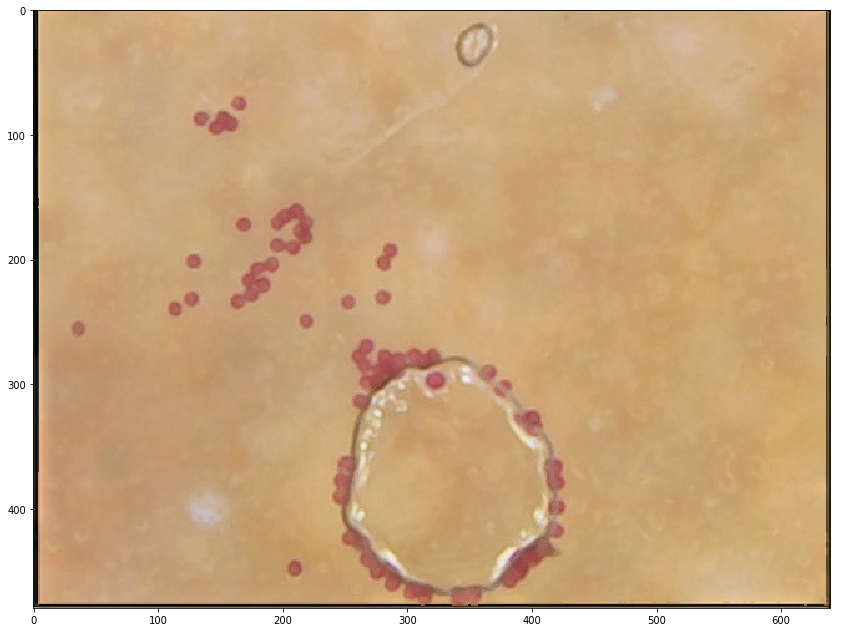

In [2]:
EXTENSIONS = set(["bmp", "jpeg", "jpg", "png", "tif", "tiff"])

src_dir = "ImageStAverage2"
src_contents = os.walk(src_dir)
dirpath, _, fnames = next(src_contents)

image_dir = os.path.split(dirpath)[-1]

print("Processing '" + image_dir + "' folder...")

image_files = sorted([os.path.join(dirpath, name) for name in fnames])
image_files = [cv2.imread(name) for name in image_files
          if os.path.splitext(name)[-1][1:].lower() in EXTENSIONS]

if any([image is None for image in image_files]):
    raise RuntimeError("One or more input files failed to load.")
    
stacked = stk.stack_focus(image_files)
plt.figure(figsize=(16,11))
plt.imshow(cv2.cvtColor(stacked, cv2.COLOR_BGR2RGB))
plt.show()